In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [37]:
img = np.array(Image.open('Data/test_calibration_0.JPG'))
height, width = np.shape(img)[:2]

print(width, height)
# For light correction, we want two separate images, one vertical and one horizontal
maskXBounds = [1900, 2750] # Found manually
maskYBounds = [1025, 1800] # Found manually
verticalMask = np.array([[int(i < maskXBounds[1] and i > maskXBounds[0]) for i in range(width)] for j in range(height)])
horizontalMask = np.transpose([[int(i < maskYBounds[1] and i > maskYBounds[0]) for i in range(height)] for j in range(width)])

4288 2848


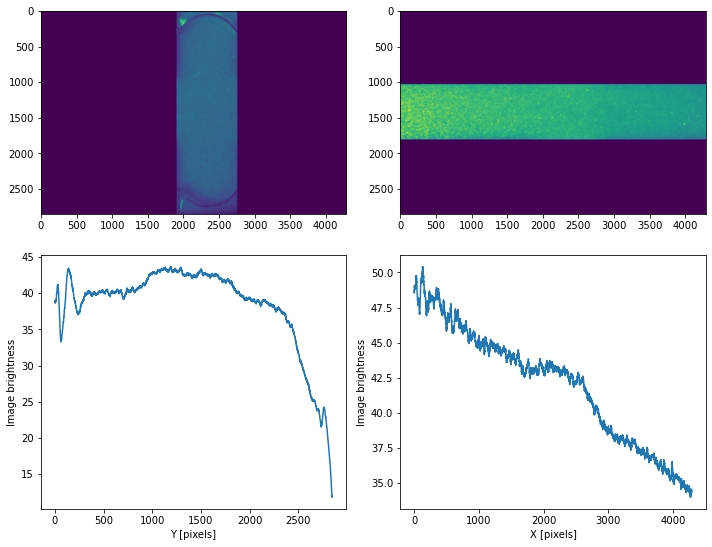

In [49]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

verticallyMasked = img[:,:,1] * verticalMask
horizontallyMasked = img[:,:,1] * horizontalMask

ax[0,0].imshow(verticallyMasked)
ax[0,1].imshow(horizontallyMasked)

# This excludes all values of zero, so that we get an actual pixel value we can directly add
brightnessByRow = np.nanmean(np.where(verticallyMasked != 0, verticallyMasked, np.nan), axis=1)
ax[1,0].plot(brightnessByRow)
ax[1,0].set_ylabel('Image brightness')
ax[1,0].set_xlabel('Y [pixels]')

brightnessByColumn = np.nanmean(np.where(horizontallyMasked != 0, horizontallyMasked, np.nan), axis=0)
ax[1,1].plot(brightnessByColumn)
ax[1,1].set_ylabel('Image brightness')
ax[1,1].set_xlabel('X [pixels]')

fig.tight_layout()
plt.show()

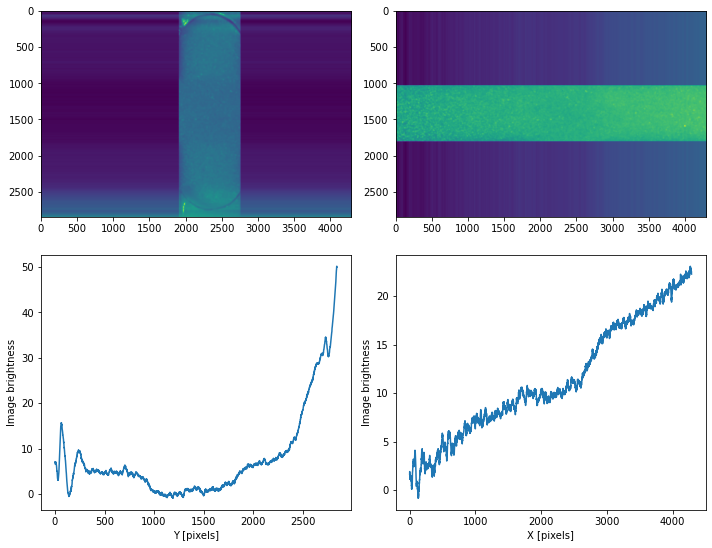

In [66]:
# Now calculate the correction
horizontalCorrection = np.mean(brightnessByColumn) - brightnessByColumn
correctedHorizontalImg = horizontallyMasked + np.repeat([horizontalCorrection], height, axis=0)
# Reapply the gradient
#correctedHorizontalImg *= horizontalMask

verticalCorrection = np.mean(brightnessByRow) - brightnessByRow
correctedVerticalImg = verticallyMasked + np.transpose(np.repeat([verticalCorrection], width, axis=0))
#correctedVerticalImg *= verticalMask

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

ax[0,0].imshow(correctedVerticalImg)
ax[0,1].imshow(correctedHorizontalImg)

# This excludes all values of zero, so that we get an actual pixel value we can directly add
brightnessByRow = np.nanmean(np.where(correctedVerticalImg != 0, correctedVerticalImg, np.nan), axis=1)
ax[1,0].plot(brightnessByRow)
ax[1,0].set_ylabel('Image brightness')
ax[1,0].set_xlabel('Y [pixels]')

brightnessByColumn = np.nanmean(np.where(correctedHorizontalImg != 0, correctedHorizontalImg, np.nan), axis=0)
ax[1,1].plot(brightnessByColumn)
ax[1,1].set_ylabel('Image brightness')
ax[1,1].set_xlabel('X [pixels]')

fig.tight_layout()
plt.show()